In [1]:
import re

In [2]:
# pip install transformers==2.1.0

In [3]:
import pandas as pd
data= pd.read_csv("Club name.csv", index_col=False)
data.drop('Unnamed: 0', axis=1, inplace=True)

# data

In [4]:
new_Df= pd.read_csv("labelled_data.csv", index_col=False)
new_Df.drop('Unnamed: 0', axis=1, inplace=True)
new_Df.drop('retweet', axis=1, inplace=True)

# new_Df

In [5]:

Promo=[]


# Labelling promotional tweets from the data using algorithm 

for tweet in new_Df['tweets']:
    
    if 'RT @' in tweet or re.findall('\A@', tweet):
        Promo.append('None')
        
    elif 'RT @' not in tweet:
            #
            if  re.findall('drink', tweet, flags=re.IGNORECASE) or re.findall('£', tweet):
                Promo.append('Yes')
            else:
                Promo.append('No')


# adding labelled data to data frame 
new_Df['Promo']= Promo

new_Df.drop(new_Df[(new_Df['Promo']== 'None')].index, inplace=True)

#printing new data frame: 
new_Df

new_Df.to_csv('Clubname.csv')


In [6]:
# Since our data is not balanced we use 


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score




# Counting number of true positives, true negatives, falsepositives, false negatives :

act_pos=[]
act_neg=[]
pred_pos=[]
pred_neg=[]

# define actual
for i in new_Df['Promotional ']:
    if i.strip() == 'Yes':
        act_pos.append(1)
    else:
        act_neg.append(0)
        
# define predictions
for i in new_Df['Promo']:
    if i =='Yes':
        pred_pos.append(1)
    else:
        pred_neg.append(0)

# calculate prediction
 
y_true = act_pos + act_neg
y_pred = pred_pos + pred_neg


# calculate score

precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

score = f1_score(y_true, y_pred, average='binary')
print('F-Measure: %.3f' % score)


Precision: 0.667
Recall: 1.000
F-Measure: 0.800


In [32]:
data['time']= pd.to_datetime(data.time)
date=[]
for i in data['time']:
    date.append(i.date())
data['date']= date
data['date'] = pd.to_datetime(data['date'])  

''' Selecting data between given date ranges'''


#greater than the start date and smaller than the end date
# mask = (data['date'] > start_date) & (data['date'] <= end_date)

mask = (data['date'] >= '2019-1-1') & (data['date'] < '2020-1-1')
data= (data.loc[mask])

# data

In [8]:


data['time']= pd.to_datetime(data.time)
date=[]
for i in data['time']:
    date.append(i.date())
data['date']= date
data['date'] = pd.to_datetime(data['date'])  

''' Selecting data between given date ranges'''
#greater than the start date and smaller than the end date
# mask = (data['date'] > start_date) & (data['date'] <= end_date)

mask = (data['date'] >= '2019-1-1') & (data['date'] < '2020-1-1')
data= (data.loc[mask])

data

''' Labelling all data using conditons'''


Promo=[]


# Labelling promotional tweets from the data using algorithm 

for tweet in data['tweets']:
    
    if 'RT @' in tweet or re.findall('\A@', tweet):
        Promo.append('None')
        
    elif 'RT @' not in tweet:
            #
            if  re.findall('drink', tweet, flags=re.IGNORECASE) or re.findall('£', tweet):
                Promo.append('Yes')
            else:
                Promo.append('No')
        
# adding labelled data to data frame 
data['Promo']= Promo

#dropping all retweets

#data.drop(data[(data['Promo']== 'None')].index, inplace=True)

data.describe()

,likes,retweet
count,1963.000000,1963.000000
mean,0.108507,0.209373
std,0.593839,0.689571
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,22.000000,15.000000


In [9]:
data.to_csv('highest_day.csv')


In [10]:
data['time']= pd.to_datetime(data.time)
    

In [11]:
data['time']= pd.to_datetime(data.time)
date=[]
for i in data['time']:
    date.append(i.date())
data['date']= date
data['date'] = pd.to_datetime(data['date'])  



In [12]:
''' Selecting data between given date ranges'''
#greater than the start date and smaller than the end date
# mask = (data['date'] > start_date) & (data['date'] <= end_date)

mask = (data['date'] >= '2019-1-1') & (data['date'] < '2020-1-1')
data= (data.loc[mask])

# data

In [13]:
'''Grouping data by Promotional and Non-Promotional Category '''

xy=[]
xy= data[data.Promo == 'Yes']
ny= data[data.Promo == 'No']

np1 = ny.groupby(['Promo', 'date']).size().reset_index(name='counts')


p1= xy.groupby(['Promo', 'date']).size().reset_index(name='promo_pryzm')
 

    
    
    
    
#Appending all count and promo data and saving the dataframe as csv




    
full_df = data.groupby([ 'date']).size().reset_index(name='all_pryzm')

p1['date']= pd.to_datetime(p1.date)
p1.drop('Promo', axis=1, inplace=True)


full_df = pd.merge(p1,full_df,on= 'date', how= 'outer')
full_df= full_df.fillna(0)
# print(full_df)
full_df.to_csv('pryzm_count.csv')

# full_df

In [14]:
# getting maximum value of counts:
xmax= p1['promo_pryzm'].max()
ymax= np1['counts'].max()
print(xmax)
print(ymax)

12
5


In [35]:
# highest Promotional activity on: 
# print(p1[p1['promo_club']== xmax])

# Highest non promotion on: 
print(np1[np1['counts']== ymax])

pe=(data[data['date']== '2019-8-17'])
pe.count()

   Promo       date  counts
10    No 2019-02-01       5
22    No 2019-02-15       5
27    No 2019-02-21       5


tweets     12
likes      12
time       12
retweet    12
date       12
Promo      12
dtype: int64

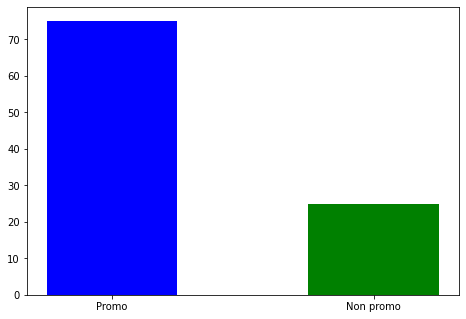

Percentage of Drinks Promotion : 75.17647058823529 %
Percentage of Non_Drinks Promotion : 24.823529411764707 %


In [16]:

import matplotlib.pyplot as plt
from matplotlib import rcParams

np2= sum(np1['counts'])
p2= sum(p1['promo_pryzm'])


fig = plt.figure()

m= p2+np2
x= (p2/m)*100
y=(np2/m)*100


ax = fig.add_axes([0,0,1,1])
ax.bar('Promo', x, color = 'b',width=0.5)
ax.bar('Non promo', y, color = 'g',width=0.5)
plt.show()

print('Percentage of Drinks Promotion :' ,x ,'%')
print('Percentage of Non_Drinks Promotion :' ,y ,'%')


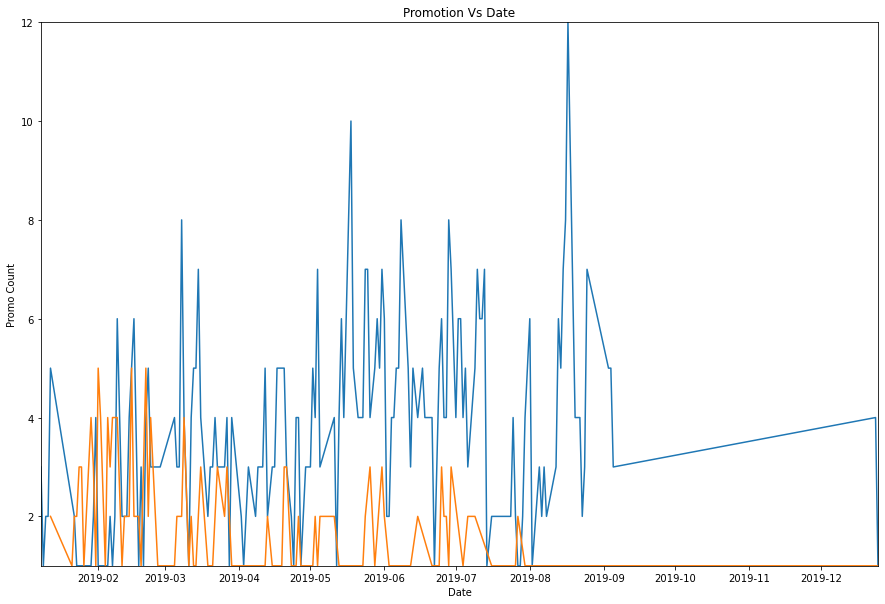

In [17]:
Year = p1['date']

rcParams['figure.figsize']= 15,10
Count = p1['promo_pryzm']

plt.plot(Year, Count)
plt.plot(np1['date'], np1['counts'])
plt.margins(x=0, y=0)

plt.title('Promotion Vs Date')
plt.xlabel('Date')
plt.ylabel('Promo Count')

plt.show()

In [36]:
# print(full_df.tail(20))

In [37]:
# pd.options.display.max_colwidth = 1000
# xmd = (data['date'] > '2019-8-1') & (data['date'] <= '2019-9-30')
# xmd = (data.loc[mask])
# pe=(data[data['date']== '2019-8-17'])
# pe['tweets']


In [38]:
# pd.options.display.max_colwidth = 1000
# xmd = (data['date'] > '2019-5-1') & (data['date'] <= '2019-6-30')
# xmd = (data.loc[mask])
# pe=(data[data['date']== '2019-5-18'])
# pe['tweets']

In [39]:
# pd.options.display.max_colwidth = 1000
# xmd = (data['date'] > '2019-5-1') & (data['date'] <= '2019-6-30')
# xmd = (data.loc[mask])
# pe=(data[data['date']== '2019-6-8'])
# pe['tweets']

In [40]:
# pe=(data[data['date']== '2019-8-17'])
# pe['tweets']


In [26]:
# data['Promotional_M']= data_2
# data_2= data.iloc[ : , 0:30]

# # data.iloc[0:30, 5]
# #Counting numbers of Yes and No In promotional data #normalize=True for percentage 
# m= data['Promotional_M'].value_counts()
# print ('Percentage of :', m )
# data_2.DataFrame()


In [27]:
# # calculates precision for 1:100 dataset with 90 tp and 30 fp
# from sklearn.metrics import precision_score
# # define actual
# act_pos = [1 for _ in range(100)]
# act_neg = [0 for _ in range(10000)]
# y_true = act_pos + act_neg
# # define predictions
# pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
# pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
# y_pred = pred_pos + pred_neg
# # calculate prediction
# precision = precision_score(y_true, y_pred, average='binary')
# print('Precision: %.3f' % precision)

In [28]:
# #Initialising new array and counting number of true and false positives

# cf=[]
# for x in range(29):
#     cf.append((data.iloc[x,5]) == (data.iloc[x,4].strip()))

# cf


# print (cf.count(True)/ 30)



In [29]:

# promo_list_drinks= []
# promo_list_p= []
# drinks_type = 'Smirnoff', 'Prosecco','VK', 'Budwesier', 'Ciroc','Gin'

# for i in data['tweets']:
#     if  re.findall('drink', i, flags=re.IGNORECASE) :
        
#         promo_list_drinks.append(i)
        
#     if re.findall('£', i):
#         promo_list_p.append(i)
   



In [30]:
# promo_p = pd.DataFrame({'Offers': promo_list_p})
# promo_d = pd.DataFrame({'Offers': promo_list_drinks})

# print(promo_p['Offers'][9])
# print(promo_d.shape)
# promo_p.shape





In [31]:
# for p in promo_p['Offers']: 
#     if (re.findall('£*' +'ticket', p)):
#         print(p)
        
